In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn as sk
import scipy as sp
import regex as re
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Reading the data file
df=pd.read_csv(r"C:\Users\shali\Downloads\train_HRAnalytics.csv")

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Exploratory Data Analysis

In [5]:
df.shape

(54808, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
# I consider there are no outliers as there is no much difference between min and max values in the above data.

In [30]:
# pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(df, title="HRAnalytics")

In [10]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Handling missing values in 'education' and 'previous_year_rating' columns

In [8]:
print(df.isna().mean().round(4) * 100)

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64


<AxesSubplot:xlabel='previous_year_rating', ylabel='Count'>

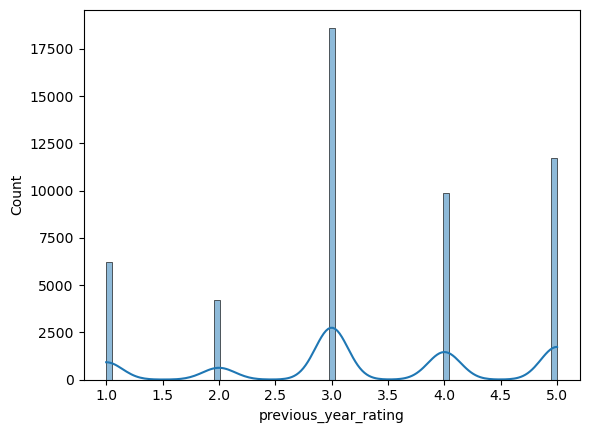

In [9]:
sns.histplot(df['previous_year_rating'], kde=True)

In [10]:
#As the data is normally distributed we Impute missing values with mean
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mean())

<AxesSubplot:xlabel='education', ylabel='Count'>

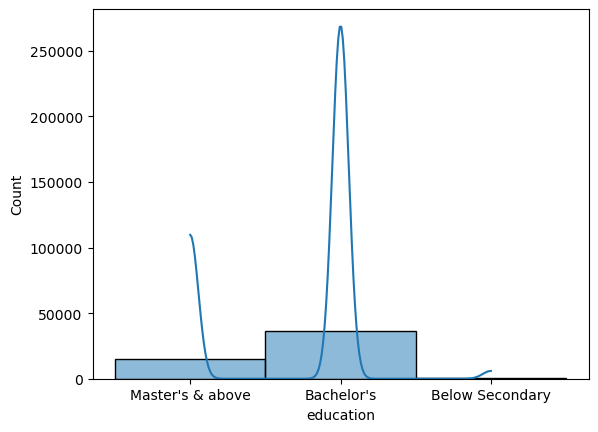

In [11]:
sns.histplot(df['education'], kde=True)

In [12]:
# As the above data has Bachelors education as mostly repeated we impute missing data wi the same
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [13]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

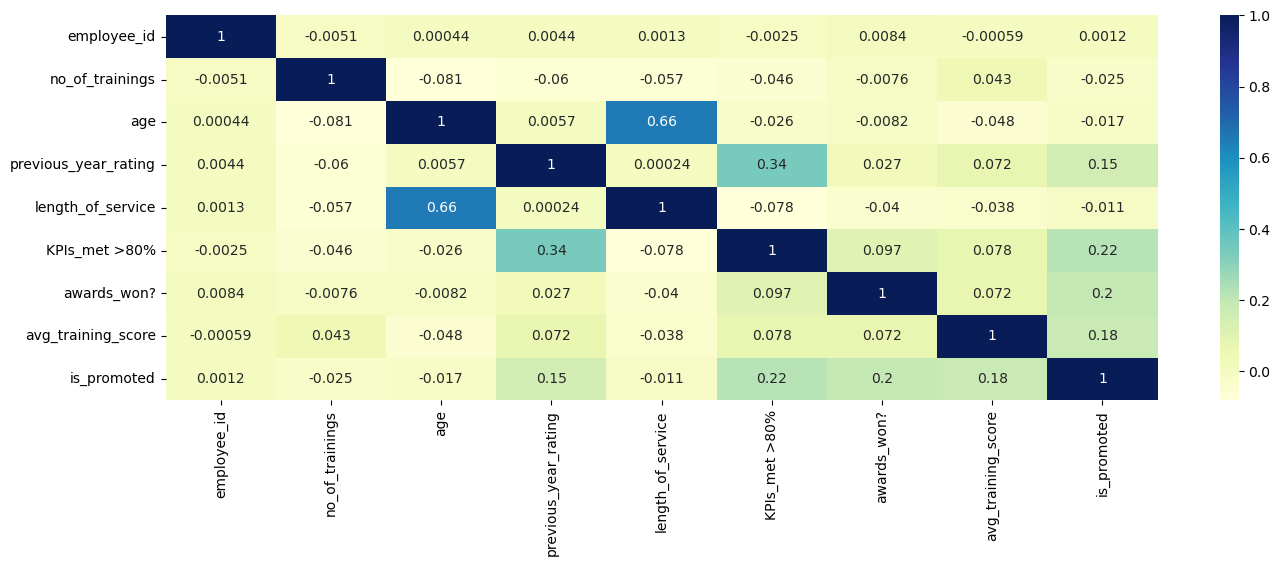

In [14]:
# plotting correlation heatmap
plt.figure(figsize = (16,5))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [15]:
# As employee_id has no impact on target variable considered dropping it
df=df.drop(['employee_id'],axis=1)

In [17]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [19]:
# There are five categorical variables in data
df.select_dtypes(include=['object']).columns.tolist()

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [20]:
df['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [21]:
df['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [22]:
df['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [23]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [24]:
df['department'].nunique()

9

In [25]:
df['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [26]:
df['region'].nunique()

34

In [27]:
# Encoding the Categorical variables
from sklearn.preprocessing import LabelEncoder

In [28]:
df['gender']=df['gender'].map        

In [29]:
df['education']=df['education'].map({"Below Secondary":0,"Bachelor's":1,"Master's & above":2})

In [41]:
def frequency_encoding(df, features):
    for feat in features:
        freq = df[feat].value_counts(normalize=True)
        mapping_dict = freq.to_dict()
        df[feat] = df[feat].map(mapping_dict)
    return df

nominal_features = ['department', 'region', 'recruitment_channel']

df = frequency_encoding(df, nominal_features)

In [42]:
df['department'].head()


0    0.307254
1    0.207050
2    0.307254
3    0.307254
4    0.130236
Name: department, dtype: float64

In [43]:
df['region'].head()

0    0.088363
1    0.117282
2    0.015947
3    0.021438
4    0.041235
Name: region, dtype: float64

In [44]:
df.filter(like='object').columns

Index([], dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   department                54808 non-null  float64
 1   region                    54808 non-null  float64
 2   education                 54808 non-null  int64  
 3   gender                    54808 non-null  int64  
 4   recruitment_channel       54808 non-null  float64
 5   no_of_trainings           54808 non-null  int64  
 6   age                       54808 non-null  int64  
 7   previous_year_rating      54808 non-null  float64
 8   length_of_service         54808 non-null  int64  
 9   KPIs_met >80%             54808 non-null  int64  
 10  awards_won?               54808 non-null  int64  
 11  avg_training_score        54808 non-null  int64  
 12  is_promoted               54808 non-null  int64  
 13  department_freq           54808 non-null  float64
 14  region

In [ ]:

''''
https://catboost.ai/en/docs/features/cross-validation
Catboost
When running machine learning algorithms, simply assigning numbers to categorical variables work if a category has only two levels. This is the case for gender (male/female), bought a product (yes/no), attended a course (yes/no). When a category has several levels, as with nationality, assigning numbers to each level implies an order of the levels. This means that one level of the category has a lower rank than another level. While this makes sense for ordinal variables (e.g., preferences of food items or educational degree), it is a wrong assumption for nominal variables such as color preferences, nationality, residential city specially when we use linear Algorithms. Algorithms like CatBoost have different perspective to solve this problem.
We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features.
In detail , Catboost calculates for every category of a nominal variable , a value (target-based statistic). This is done using a number of steps: We begin with one categorical feature (e.g., Nationality). This is called x. In one randomly chosen row (k-th row in the training data set), we exchange one random level of this categorical feature (i-th level of x) with a number (e.g., Dutch by 5) This number (in our example 5) is usually based on the target variable (the one we want to predict) conditional on the category level. In other words, the target number is based on the expected outcome variable. A splitting attribute is used to create two sets of the training data: One set that has all categories (e.g., German, French, Indian etc) who will have greater target variable than the one computed in step 3, and the other set with smaller target variables.
catb
In their paper authors describe how catboost is dealing with categorical features. The standard way is to compute some statistics, such as median, based on the label values of the category. However, this creates problems if there is only one example for a label value. In this case, the numerical value of the category would be the same than the label value. For example if in our example with nationalities, the category Belgian is assigned the value 2, and there is only 1 Belgian student, this student would get the value 2 for nationality. This can create problems of overfitting.
To avoid this problem, the authors designed a solution which involves randomly changing the order of rows in the complete data set. We perform a random permutation of the data set and for each example we compute average label value for the example with the same category value placed before the given one in the permutation .In their paper they also describe how different features are combined to create a new feature. Think about it, every individual observations of categorical and numerical data points describe one observation. The chances that two observations are exactly identical is slim. Hence, different categorical values and numerical values could be combined to create a unique merged categorical variable which contains all the different individual choices. While this might sound easy, doing this for all potential types of combinations will be computational intensive. Another way to combine different features is to do a greedy search at every tree split. Catboost does this by combining all categorical and numerical values at the current tree with all categorical values in the data set.
Transforming categorical features to numerical features methods are:

Borders
Buckets
BinarizedTargetMeanValue
Counter


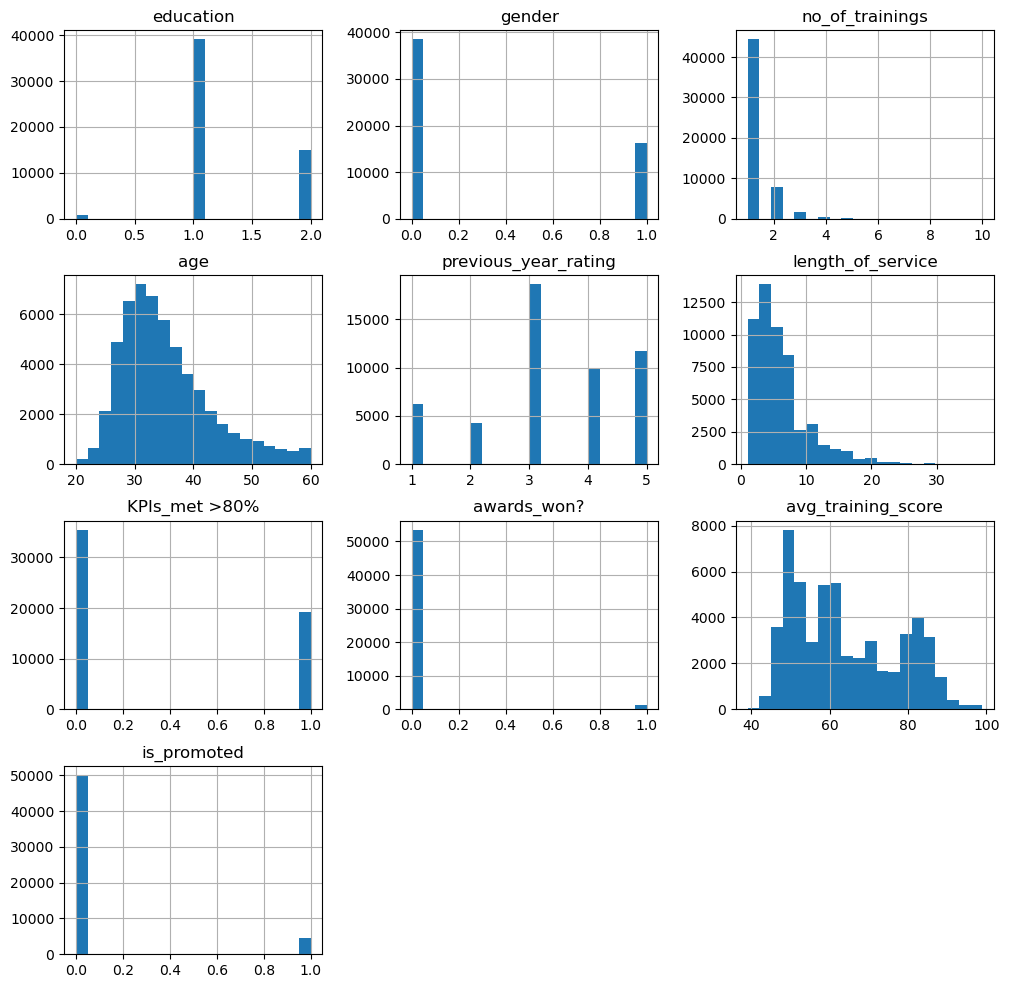

In [38]:
df.hist(figsize=(12,12), bins=20)
plt.show()

In [18]:
# there is high class imbalance
df['is_promoted'].value_counts(normalize=True) * 100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

In [46]:
# Seperating Target variableand independent variables
X=df.drop(['is_promoted'],axis=1)

In [47]:
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_freq,region_freq,recruitment_channel_freq,{feat}
0,0.307254,0.088363,2,1,0.423661,1,35,5.0,8,1,0,49,0.307254,0.088363,0.423661,0.423661
1,0.207050,0.117282,1,0,0.555503,1,30,5.0,4,0,0,60,0.207050,0.117282,0.555503,0.555503
2,0.307254,0.015947,1,0,0.423661,1,34,3.0,7,0,0,50,0.307254,0.015947,0.423661,0.423661
3,0.307254,0.021438,1,0,0.555503,2,39,1.0,10,0,0,50,0.307254,0.021438,0.555503,0.555503
4,0.130236,0.041235,1,0,0.555503,1,45,3.0,2,0,0,73,0.130236,0.041235,0.555503,0.555503


In [52]:
y=df['is_promoted']
y.head

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64>

In [50]:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [64]:
# pip install lightgbm


     ---------------------------------------- 1.0/1.0 MB 3.4 MB/s eta 0:00:00


In [65]:
# pip install catboost

     ---------------------------------------- 74.0/74.0 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [54]:
from lightgbm import LGBMClassifier 

In [55]:
lgb=LGBMClassifier(learning_rate=0.1, n_estimators=100)

In [56]:
lgb.fit(x_train,y_train)

LGBMClassifier()

In [57]:
y_pred=lgb.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [61]:
print("Precision: ", precision_score(y_test, y_pred,average='weighted'))
print("Recall: ", recall_score(y_test, y_pred,average='weighted'))
print("F1 score: ",f1_score(y_test, y_pred,average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Precision:  0.9403166146869126
Recall:  0.9417077175697866
F1 score:  0.9286807633062559
Accuracy:  0.9417077175697866


In [70]:
from sklearn.model_selection import GridSearchCV


In [74]:
param_grid = {
    'max_bin':[300,320,340],
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [5, 10, 20],
}

grid_search = GridSearchCV(lgb, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'min_child_samples': 5, 'n_estimators': 200, 'num_leaves': 10}
Best score: 0.9404962516317396


In [ ]:
param_grid = {
    'max_bin':[300,320,340],
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [5, 10, 20],
}

grid_search = GridSearchCV(lgb, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [62]:
from catboost import CatBoostClassifier

In [63]:
cb=CatBoostClassifier()

In [64]:
cb.fit(x_train,y_train)

Learning rate set to 0.051765
0:	learn: 0.6327832	total: 180ms	remaining: 2m 59s
1:	learn: 0.5804253	total: 205ms	remaining: 1m 42s
2:	learn: 0.5254475	total: 232ms	remaining: 1m 17s
3:	learn: 0.4861012	total: 257ms	remaining: 1m 3s
4:	learn: 0.4560051	total: 279ms	remaining: 55.5s
5:	learn: 0.4293513	total: 299ms	remaining: 49.6s
6:	learn: 0.4039260	total: 321ms	remaining: 45.5s
7:	learn: 0.3824075	total: 342ms	remaining: 42.5s
8:	learn: 0.3641244	total: 364ms	remaining: 40.1s
9:	learn: 0.3498691	total: 386ms	remaining: 38.2s
10:	learn: 0.3265389	total: 409ms	remaining: 36.8s
11:	learn: 0.3144790	total: 430ms	remaining: 35.4s
12:	learn: 0.3040046	total: 449ms	remaining: 34.1s
13:	learn: 0.2910156	total: 467ms	remaining: 32.9s
14:	learn: 0.2842779	total: 486ms	remaining: 31.9s
15:	learn: 0.2766929	total: 507ms	remaining: 31.2s
16:	learn: 0.2706126	total: 527ms	remaining: 30.5s
17:	learn: 0.2635231	total: 549ms	remaining: 29.9s
18:	learn: 0.2575560	total: 569ms	remaining: 29.4s
19:	lear

In [67]:
y_pred_cb=lgb.predict(x_test)

In [68]:
print("Precision: ", precision_score(y_test, y_pred_cb,average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_cb,average='weighted'))
print("F1 score: ",f1_score(y_test, y_pred_cb,average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_cb))

Precision:  0.9403166146869126
Recall:  0.9417077175697866
F1 score:  0.9286807633062559
Accuracy:  0.9417077175697866
